## Towards Understanding Clients of FHFA loans.
By Mahfuz Miah, February 3, 2020

## 1. Background
**Source of Data**: https://www.fhfa.gov/DataTools/Downloads/Pages/FHLBank-Public-Use-Database-Previous-Years.aspx

**What is FHFA?**
- Federal Housing Finance Agency, Federal Home Loan Bank Purchased Mortgage Files

**What is the goal of this project?**
- What can we learn about clients of FHFA?

**What is the goal of FHFA as government agency?**
- "An independent regulatory agency, we oversee vital components of the secondary mortgage market including Fannie Mae, Freddie Mac and the Federal Home Loan Banks.  Our goal is to keep them, and the overall housing finance system, healthy."

**Dictionary of Column Names and Data Meanings:**
https://www.fhfa.gov/DataTools/Downloads/Documents/FHLBank-PUDB/AMA_PUDB_definitions_2018.pdf


## 2. Guiding Question and Significance
**Can we predict REO (real-estate owned) status of a home based on originating features of the mortgage and client characteristics?**


- Governments have policies to help the public while also protecting against waste. Though the FHFA has regulations in place to allow for good mortgage transactions to take place, not all mortgages end well. We want to inform the government on characteristics that would predict for future negative outcomes of a mortgage. We want to help avoid foreclosures and subsequent REO status by flagging these early characteristics. In effect, we get to investigate whether the mortgage loan is likely to be ‘bad’ down the line even though current regulations allow for the mortgage to get processed.

- Such findings could also direct the government to provide services or resources to counter the underlying aspects of these predictive features that foreshadow a negative mortgage outcome. This would benefit the agency and the public as a whole.


## 3. Understanding and Preparing the Data Set

### a. Initial Set Up of Dataframe

In [1]:
#Libraries:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statistics
from pandas import DataFrame
import datetime
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine
from sklearn import linear_model
from fractions import Fraction
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import normaltest
import math
from textwrap import wrap
from scipy.stats import boxcox

#regression,CV libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

#clustering libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline


from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
import graphviz
import time

# set up the figure size
%matplotlib inline

In [2]:
# Set up the data

def setdata(filename):
    df = pd.read_csv(filename)
    
    # Strip and make column names lowercase so that they are easy to manage. 
    df.columns = df.columns.str.strip().str.lower()

    # Replace characters or remove spaces and make all words lowercase.
    df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

    return df

In [3]:
# define path to website with the bank data
path = "https://www.fhfa.gov/DataTools/Downloads/Documents/FHLBank-PUDB/2018_PUDB_EXPORT_123118.csv"

In [4]:
# setup the dataframe
df = setdata(path)

In [5]:
# let's see what it looks like
df

,year,assignedid,bank,fipsstatecode,fipscountycode,msa,featureid,tract,minper,tramedy,...,corace2,corace3,corace4,corace5,hoepa,lienstatus,spchsggoals,fedfinstbltyplan,acqtyp,gsereo
0,2018,2131406,Atlanta,24,21,47900,9999999999,7512.01,29.85,93261,...,6,6,6,6,2,1,2,2,1,2
1,2018,2131407,Atlanta,24,17,47900,9999999999,8509.04,67.24,112623,...,6,6,6,6,2,1,2,2,1,2
2,2018,2131408,Atlanta,51,153,47900,9999999999,9012.36,40.76,140156,...,6,6,6,6,2,1,2,2,1,2
3,2018,2131409,Atlanta,51,59,47900,9999999999,4221.02,75.97,89250,...,8,8,8,8,2,1,2,2,1,2
4,2018,2131410,Atlanta,24,5,12580,9999999999,4924.02,64.56,81397,...,8,8,8,8,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65698,2018,2161350,Topeka,40,143,46140,9999999999,75.22,22.82,69635,...,6,6,6,6,2,1,2,2,1,2
65699,2018,2161351,Topeka,31,109,30700,9999999999,37.09,7.61,94198,...,6,6,6,6,2,1,2,2,1,2
65700,2018,2161352,Topeka,19,133,99999,9999999999,9602.00,3.69,69688,...,8,8,8,8,2,1,2,2,1,2
65701,2018,2161353,Topeka,31,153,36540,9999999999,106.23,10.16,98707,...,6,6,6,6,2,1,2,2,1,2


In [6]:
# how big is the df?
df.shape

(65703, 82)

In [7]:
column_names = list(df.columns.values) 
print(column_names)

['year', 'assignedid', 'bank', 'fipsstatecode', 'fipscountycode', 'msa', 'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat', 'income', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate', 'purpose', 'coop', 'product', 'fedguar', 'term', 'amorterm', 'selltype', 'numbor', 'first', 'cica', 'borace', 'corace', 'bogender', 'cogender', 'boage', 'coage', 'occup', 'numunits', 'bed1', 'bed2', 'bed3', 'bed4', 'aff1', 'aff2', 'aff3', 'aff4', 'rent1', 'rent2', 'rent3', 'rent4', 'rentut1', 'rentut2', 'rentut3', 'rentut4', 'geog', 'rate', 'amount', 'front', 'back', 'bocreditscore', 'cobocreditscore', 'pmi', 'self', 'proptype', 'armindex', 'armmarg', 'prepayp', 'boeth', 'race2', 'race3', 'race4', 'race5', 'coeth', 'corace2', 'corace3', 'corace4', 'corace5', 'hoepa', 'lienstatus', 'spchsggoals', 'fedfinstbltyplan', 'acqtyp', 'gsereo']


Column names are regular, single worded, understandable and don't appear with symbols that need to be handled; we don't need further cleaning.

In [8]:
# Let's see what the names of each column actually look like
# Also, what's inside the file? Let's take a preview.
def whats_inside(df):
    col_names = list(df.columns.values) 
    print(f"Column values in dataframe: {col_names}") 
    print(df.describe())
    return column_names

column_names = whats_inside(df)
column_names

Column values in dataframe: ['year', 'assignedid', 'bank', 'fipsstatecode', 'fipscountycode', 'msa', 'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat', 'income', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate', 'purpose', 'coop', 'product', 'fedguar', 'term', 'amorterm', 'selltype', 'numbor', 'first', 'cica', 'borace', 'corace', 'bogender', 'cogender', 'boage', 'coage', 'occup', 'numunits', 'bed1', 'bed2', 'bed3', 'bed4', 'aff1', 'aff2', 'aff3', 'aff4', 'rent1', 'rent2', 'rent3', 'rent4', 'rentut1', 'rentut2', 'rentut3', 'rentut4', 'geog', 'rate', 'amount', 'front', 'back', 'bocreditscore', 'cobocreditscore', 'pmi', 'self', 'proptype', 'armindex', 'armmarg', 'prepayp', 'boeth', 'race2', 'race3', 'race4', 'race5', 'coeth', 'corace2', 'corace3', 'corace4', 'corace5', 'hoepa', 'lienstatus', 'spchsggoals', 'fedfinstbltyplan', 'acqtyp', 'gsereo']
          year    assignedid  fipsstatecode  fipscountycode           msa  \
count  65703.0  6.570300e+04   65703.000000 

['year',
 'assignedid',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'msa',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'coop',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'selltype',
 'numbor',
 'first',
 'cica',
 'borace',
 'corace',
 'bogender',
 'cogender',
 'boage',
 'coage',
 'occup',
 'numunits',
 'bed1',
 'bed2',
 'bed3',
 'bed4',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'rent1',
 'rent2',
 'rent3',
 'rent4',
 'rentut1',
 'rentut2',
 'rentut3',
 'rentut4',
 'geog',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'cobocreditscore',
 'pmi',
 'self',
 'proptype',
 'armindex',
 'armmarg',
 'prepayp',
 'boeth',
 'race2',
 'race3',
 'race4',
 'race5',
 'coeth',
 'corace2',
 'corace3',
 'corace4',
 'corace5',
 'hoepa',
 'lienstatus',
 'spchsggoals',
 'fedfinstbltyplan',
 'acqtyp',
 'gsereo']

In [9]:
# what type of data is in each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65703 entries, 0 to 65702
Data columns (total 82 columns):
year                65703 non-null int64
assignedid          65703 non-null int64
bank                65703 non-null object
fipsstatecode       65703 non-null int64
fipscountycode      65703 non-null int64
msa                 65703 non-null int64
featureid           65703 non-null int64
tract               65703 non-null float64
minper              65703 non-null float64
tramedy             65703 non-null int64
locmedy             65703 non-null int64
tractrat            65703 non-null float64
income              65703 non-null int64
curarey             65703 non-null int64
incrat              65703 non-null float64
upb                 65703 non-null int64
ltv                 65703 non-null float64
mortdate            65703 non-null int64
acqudate            65703 non-null int64
purpose             65703 non-null int64
coop                65703 non-null int64
product            

In [10]:
## Let's find the percent of empty entries in each column

def percentmissing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    #Below is code I used to check what the fractions were prior to trying to view with the dataframe version 
    #i = 0 
    #for x,y in zip(numer,denom):
    #    print (numer.index[i], ":", (Fraction(x,y)))
    #    i+=1

    #View results in dataframe
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],x,(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name','# Missing', 'Fraction Missing','Percent Missing'])
    return df1

percentmissing(df)

,Column_Name,# Missing,Fraction Missing,Percent Missing
0,year,0,0,0.0
1,assignedid,0,0,0.0
2,bank,0,0,0.0
3,fipsstatecode,0,0,0.0
4,fipscountycode,0,0,0.0
...,...,...,...,...
77,lienstatus,0,0,0.0
78,spchsggoals,0,0,0.0
79,fedfinstbltyplan,0,0,0.0
80,acqtyp,0,0,0.0


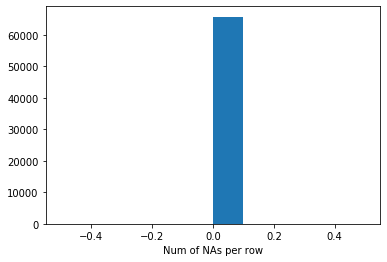

In [11]:
## Are there rows with multiple missing entries?
na_count = df.isnull().sum(axis=1) # sum up all the NAs by each row of the df
plt.hist(na_count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

Though we note that no null values currently exist in the data set, we can look at the dictionary documentation (link at the top) that list aberrant data for some columns as nonsensical entries, such as: 98, 999999999, 99, 99999. Let's take a look at the data as a whole see if we want to keep and clean these columns for the purposes of this model.


In [12]:
def num_col (df):
    numeric_columns = df.select_dtypes(['int64','float64']).columns
    print(f"The number of numerical columns is {len(numeric_columns)}")
    return numeric_columns

def non_num_col (df):
    non_numeric_columns = df.select_dtypes(['object']).columns
    print(f"The number of non-numerical columns is {len(non_numeric_columns)}")
    return non_numeric_columns

In [13]:
numeric_columns = num_col(df)
numeric_columns

The number of numerical columns is 79


Index(['year', 'assignedid', 'fipsstatecode', 'fipscountycode', 'msa',
       'featureid', 'tract', 'minper', 'tramedy', 'locmedy', 'tractrat',
       'income', 'curarey', 'incrat', 'upb', 'ltv', 'mortdate', 'acqudate',
       'purpose', 'coop', 'product', 'fedguar', 'term', 'amorterm', 'selltype',
       'numbor', 'first', 'cica', 'borace', 'corace', 'bogender', 'cogender',
       'boage', 'coage', 'occup', 'numunits', 'bed1', 'bed2', 'bed3', 'bed4',
       'aff1', 'aff2', 'aff3', 'aff4', 'rent1', 'rent2', 'rent3', 'rent4',
       'rentut1', 'rentut2', 'rentut3', 'rentut4', 'geog', 'rate', 'amount',
       'front', 'back', 'bocreditscore', 'cobocreditscore', 'pmi', 'self',
       'armindex', 'armmarg', 'boeth', 'race2', 'race3', 'race4', 'race5',
       'coeth', 'corace2', 'corace3', 'corace4', 'corace5', 'hoepa',
       'lienstatus', 'spchsggoals', 'fedfinstbltyplan', 'acqtyp', 'gsereo'],
      dtype='object')

In [14]:
non_numeric_columns = non_num_col(df)
non_numeric_columns

The number of non-numerical columns is 3


Index(['bank', 'proptype', 'prepayp'], dtype='object')

### b. Graphing Functions Used Throughout Notebook

In [15]:
# create a function that will make histogram plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphhistplt (df, columns):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].hist(df[x])
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

In [16]:
# create a function that will make distribution plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphdistplt (df, columns):
    nlength = math.floor(math.sqrt(len(columns)))+1
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:
        plt.subplot(nlength, nlength, i)
        sns.distplot(df[col], color='r')
        plt.title(F"Distribution plot of {col}")
        i+=1

    plt.tight_layout()
    plt.show()

In [17]:
# distribution visualization of data before and after boxcox transformation

def graphboxcox (df, columns):
    adj_df = df.copy()
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:

        # original data 
        ind = 4*((i-1)//4)+i # for 1st row, 3rd row...
        plt.subplot(len(columns)//4 + 1, 4, ind)
        sns.distplot(df[col])
        plt.title(f'{col}', fontsize=12)

        # transformed data
        ind2 = 4*(((i-1)//4)+1)+i # for 2nd row, 4th row...
        adj_df[col],lam = boxcox(adj_df[col]) # transform data by taking log of data
        plt.subplot(len(columns)//4 + 1, 4, ind2)
        sns.distplot(adj_df[col], color='r')
        plt.title(f'Boxcox transformed {col},lamba = {round(lam, 2)}', fontsize=12)
        i+=1

    plt.tight_layout()
    plt.show()

In [18]:
# create a function that will make box plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphboxplt (df, columns):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        #axes[i].hist(df[x])
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].boxplot(df[x],
                        sym = "k.",
                        notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        showfliers=True, # show outliers
                        flierprops=dict(color='red'))
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

In [19]:
# create a function that will make scatter plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscatter (df, columns, z):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].scatter(df[x], df[z], alpha=0.5) 
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

In [20]:
# create a function that will make seaborn scatter plots with regression line for 
# each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscattersns (df, columns, z):
    col_length = 5
    fig, axes = plt.subplots(nrows=len(columns)//col_length + 1, ncols=col_length, figsize=(64,64)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40)),fontsize = 25).set_y(1.05)
        sns.regplot(x = x, y = z, data = df, ax = axes[i]) # seaborn
    
    #fig.tight_layout()
    fig.subplots_adjust(top=1)
    plt.show()
    

### c. Dive Into The Data, EDA

In [52]:
# Too many variables, but we'd love to use if we had more computing power:
# g = sns.pairplot(df[numeric_columns]) 

KeyboardInterrupt: 

In [50]:
# Too many variables, but we'd love to use if we had more computing power:
# Let's take status of a loan into consideration and check out the pairplot
# g = sns.pairplot(df[numeric_columns], hue="gsereo", palette="Set2", diag_kind="kde")
## Useful for reference: https://seaborn.pydata.org/tutorial/axis_grids.html

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


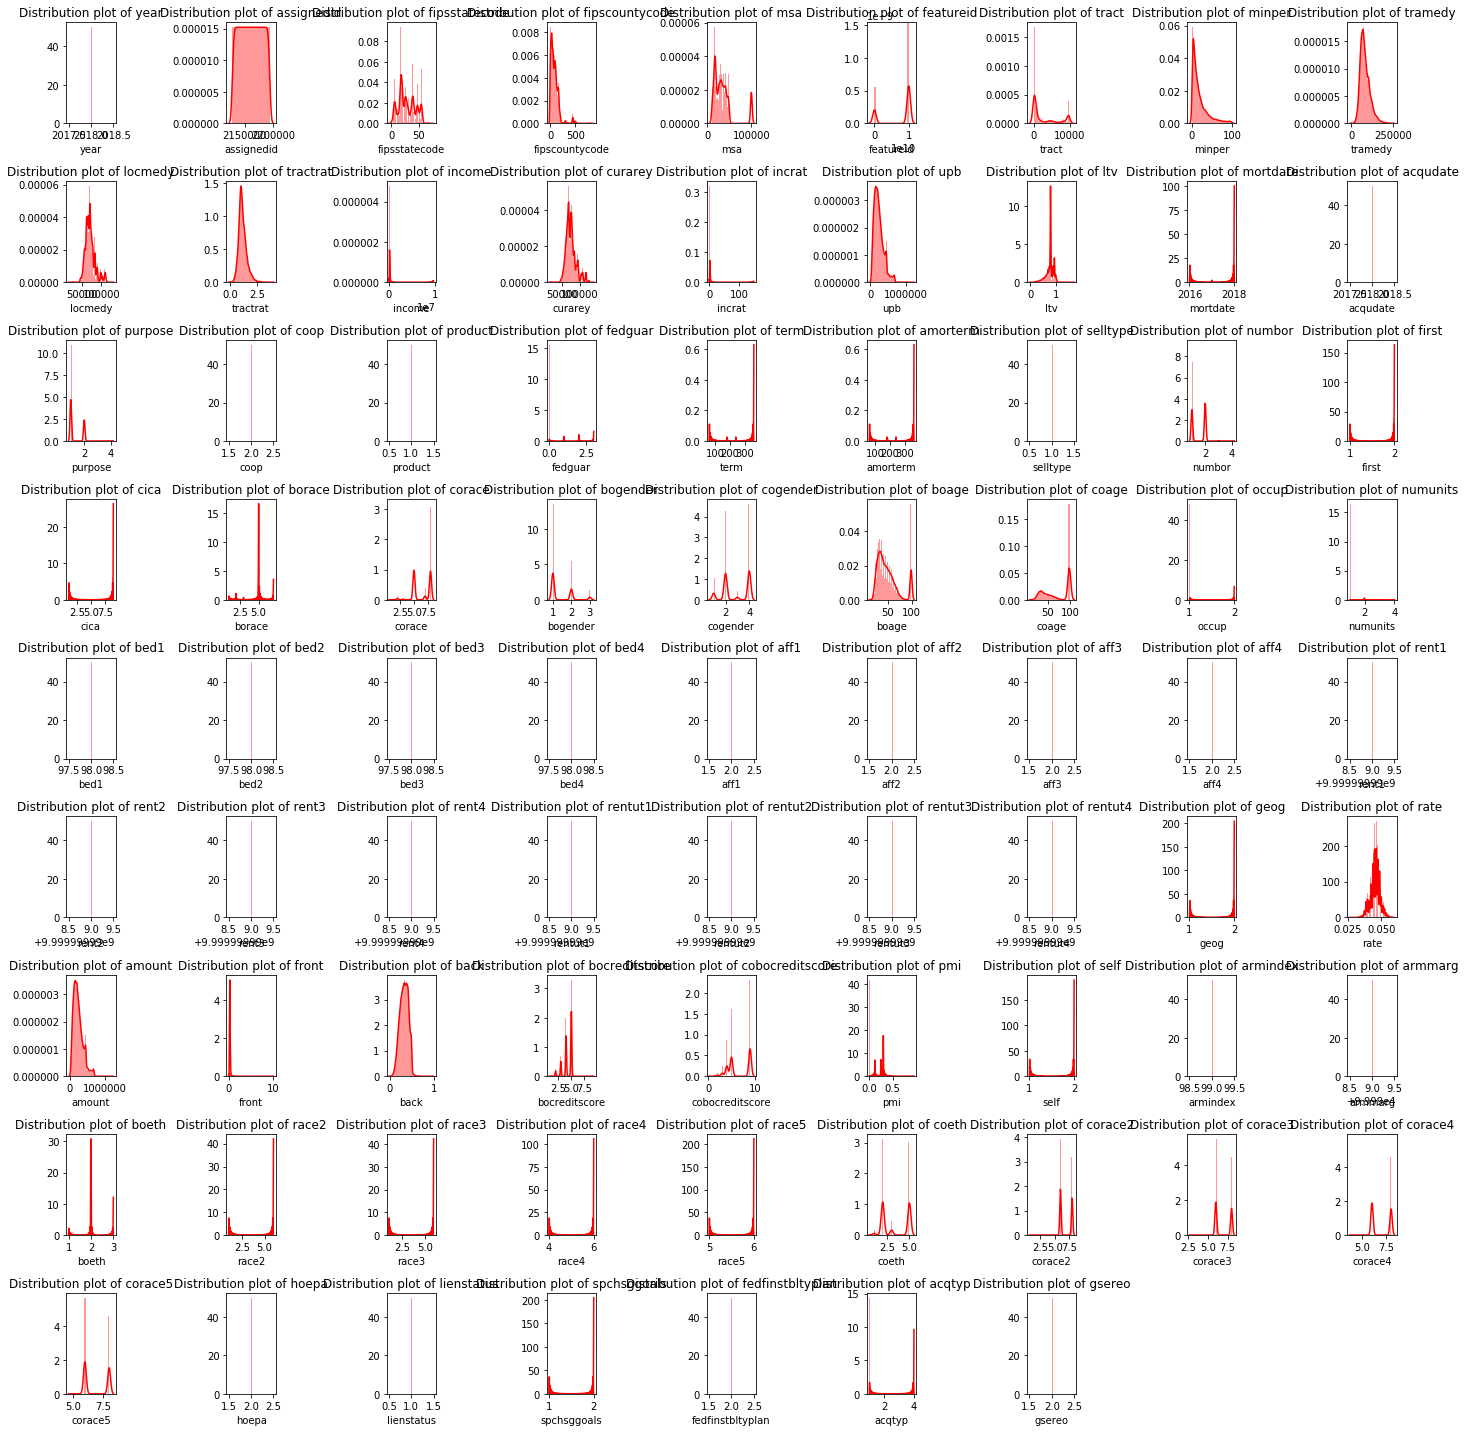

In [55]:
# visually inspect distribution for each column
graphdistplt(df,numeric_columns)

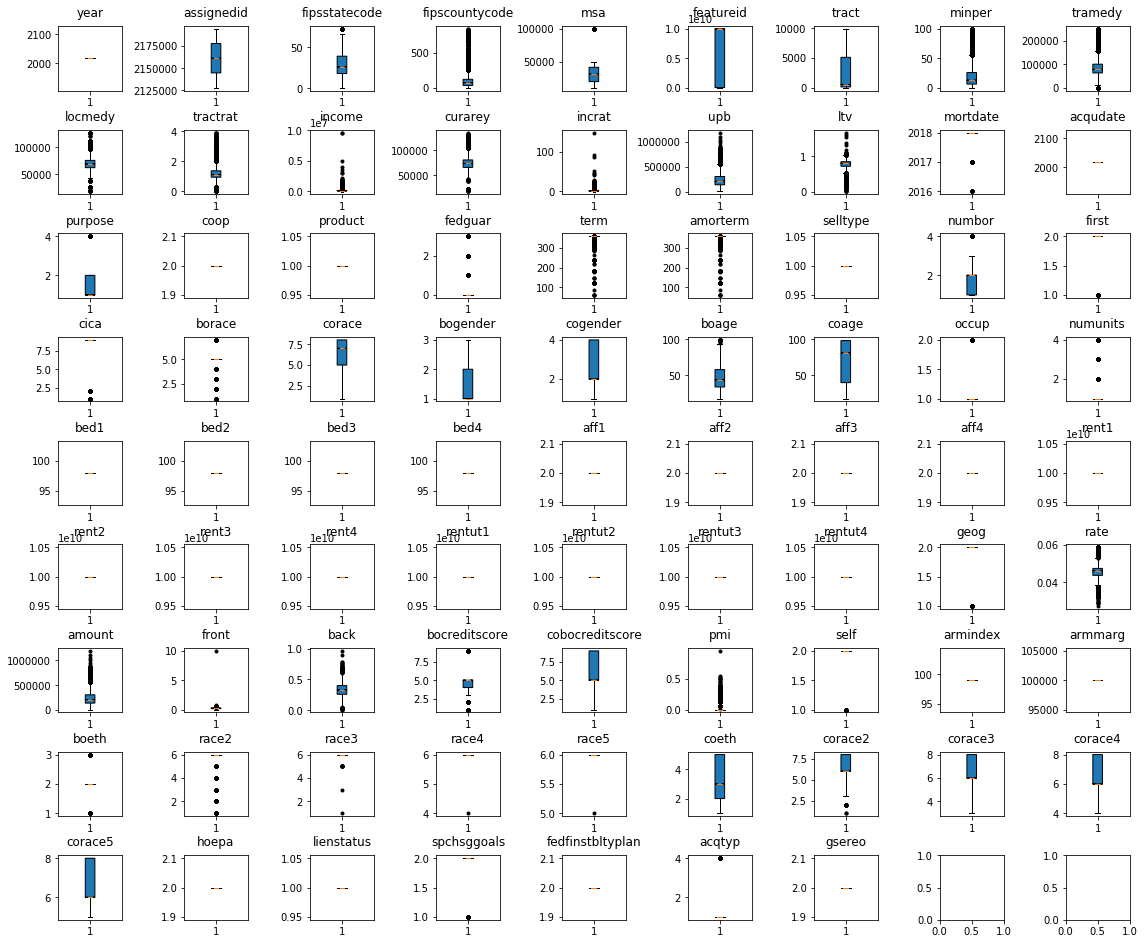

In [54]:
# visually inspect outliers  for each column
graphboxplt(df,numeric_columns)

**Takeaways:** From these graphs, we take away that many of the columns are pseudonumerical - a lot of them are actually categorical in nature but just happen to be imputted as numbers to define each category. Let's take a deeper dive in the dictionary and be more selective of the columns we want to use for clutering purposes.'

In [21]:
# copy the list of column_names
column_names

['year',
 'assignedid',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'msa',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'coop',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'selltype',
 'numbor',
 'first',
 'cica',
 'borace',
 'corace',
 'bogender',
 'cogender',
 'boage',
 'coage',
 'occup',
 'numunits',
 'bed1',
 'bed2',
 'bed3',
 'bed4',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'rent1',
 'rent2',
 'rent3',
 'rent4',
 'rentut1',
 'rentut2',
 'rentut3',
 'rentut4',
 'geog',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'cobocreditscore',
 'pmi',
 'self',
 'proptype',
 'armindex',
 'armmarg',
 'prepayp',
 'boeth',
 'race2',
 'race3',
 'race4',
 'race5',
 'coeth',
 'corace2',
 'corace3',
 'corace4',
 'corace5',
 'hoepa',
 'lienstatus',
 'spchsggoals',
 'fedfinstbltyplan',
 'acqtyp',
 'gsereo']

In [23]:
# go through library to choose features of interest and assign to a new variable
feature_columns = ['year',
                   'assignedid',
                   'bank',
                   'fipsstatecode',
                   'fipscountycode',
# 'msa',
                   'featureid',
                   'tract',
                   'minper',
                   'tramedy',
                   'locmedy',
                   'tractrat',
                   'income',
                   'curarey',
                   'incrat',
                   'upb',
                   'ltv',
                   'mortdate',
                   'acqudate',
                   'purpose',
# 'coop',
                   'product',
                   'fedguar',
                   'term',
                   'amorterm',
# 'selltype',
                   'numbor',
                   'first',
# 'cica',
                   'borace',
# 'corace',
                   'bogender',
# 'cogender',
                   'boage',
# 'coage',
                   'occup',
                   'numunits',
# 'bed1',
# 'bed2',=
# 'bed3',
# 'bed4',
# 'aff1',
# 'aff2',
# 'aff3',
# 'aff4',
# 'rent1',
# 'rent2',
# 'rent3',
# 'rent4',
# 'rentut1',
# 'rentut2',
# 'rentut3',
# 'rentut4',
# 'geog',
                   'rate',
                   'amount',
                   'front',
                   'back',
                   'bocreditscore',
# 'cobocreditscore',
                   'pmi',
                   'self',
                   'proptype',
#  'armindex',
#  'armmarg',
#  'prepayp',
#  'boeth',
#  'race2',
#  'race3',
#  'race4',
#  'race5',
#  'coeth',
#  'corace2',
#  'corace3',
#  'corace4',
#  'corace5',
#  'hoepa',
#  'lienstatus',
#  'spchsggoals',
#  'fedfinstbltyplan',
#  'acqtyp',
                   'gsereo']

In [25]:
# let's see our list of possible feature columns to include into our model
feature_columns

['year',
 'assignedid',
 'bank',
 'fipsstatecode',
 'fipscountycode',
 'featureid',
 'tract',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'purpose',
 'product',
 'fedguar',
 'term',
 'amorterm',
 'selltype',
 'numbor',
 'first',
 'borace',
 'bogender',
 'boage',
 'occup',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'bocreditscore',
 'pmi',
 'self',
 'proptype',
 'gsereo']

In [26]:
# from the feature_columns, we have to choose the features that are continuous in nature
# TODO: For future projects, it would be nice to figure out a more 
# Pythonic way to address this issue instead of handling it manually. 
# StackOverFlow has a variety of suggestions but none are readily applicable nor generalizable

feature_columns_cont = ['year',
#                         'assignedid',
#                         'bank',
#                         'fipsstatecode',
#                         'fipscountycode',
#                         'featureid',
#                         'tract',
                        'minper',
                        'tramedy',
                        'locmedy',
                        'tractrat',
                        'income',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        'acqudate',
#                         'purpose',
#                         'product',
#                         'fedguar',
                        'term',
                        'amorterm',
                        'numbor',
#                         'first',
#                         'borace',
#                         'bogender',
                        'boage',
#                         'occup',
                        'numunits',
                        'rate',
                        'amount',
                        'front',
                        'back',
#                         'bocreditscore',
                        'pmi',
#                         'self',
#                         'proptype',
#                         'gsereo'
                       ]

In [27]:
# these are the columns with continuous values
feature_columns_cont

['year',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'term',
 'amorterm',
 'numbor',
 'boage',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'pmi']

In [39]:
# select the remain columns and define them as categorical data
feature_columns_cat = list(set(feature_columns).difference(feature_columns_cont))

In [40]:
# these are the columns with categorical values
feature_columns_cat

['borace',
 'fipsstatecode',
 'selltype',
 'assignedid',
 'purpose',
 'tract',
 'fipscountycode',
 'proptype',
 'bocreditscore',
 'self',
 'bogender',
 'featureid',
 'fedguar',
 'bank',
 'first',
 'occup',
 'gsereo',
 'product']

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


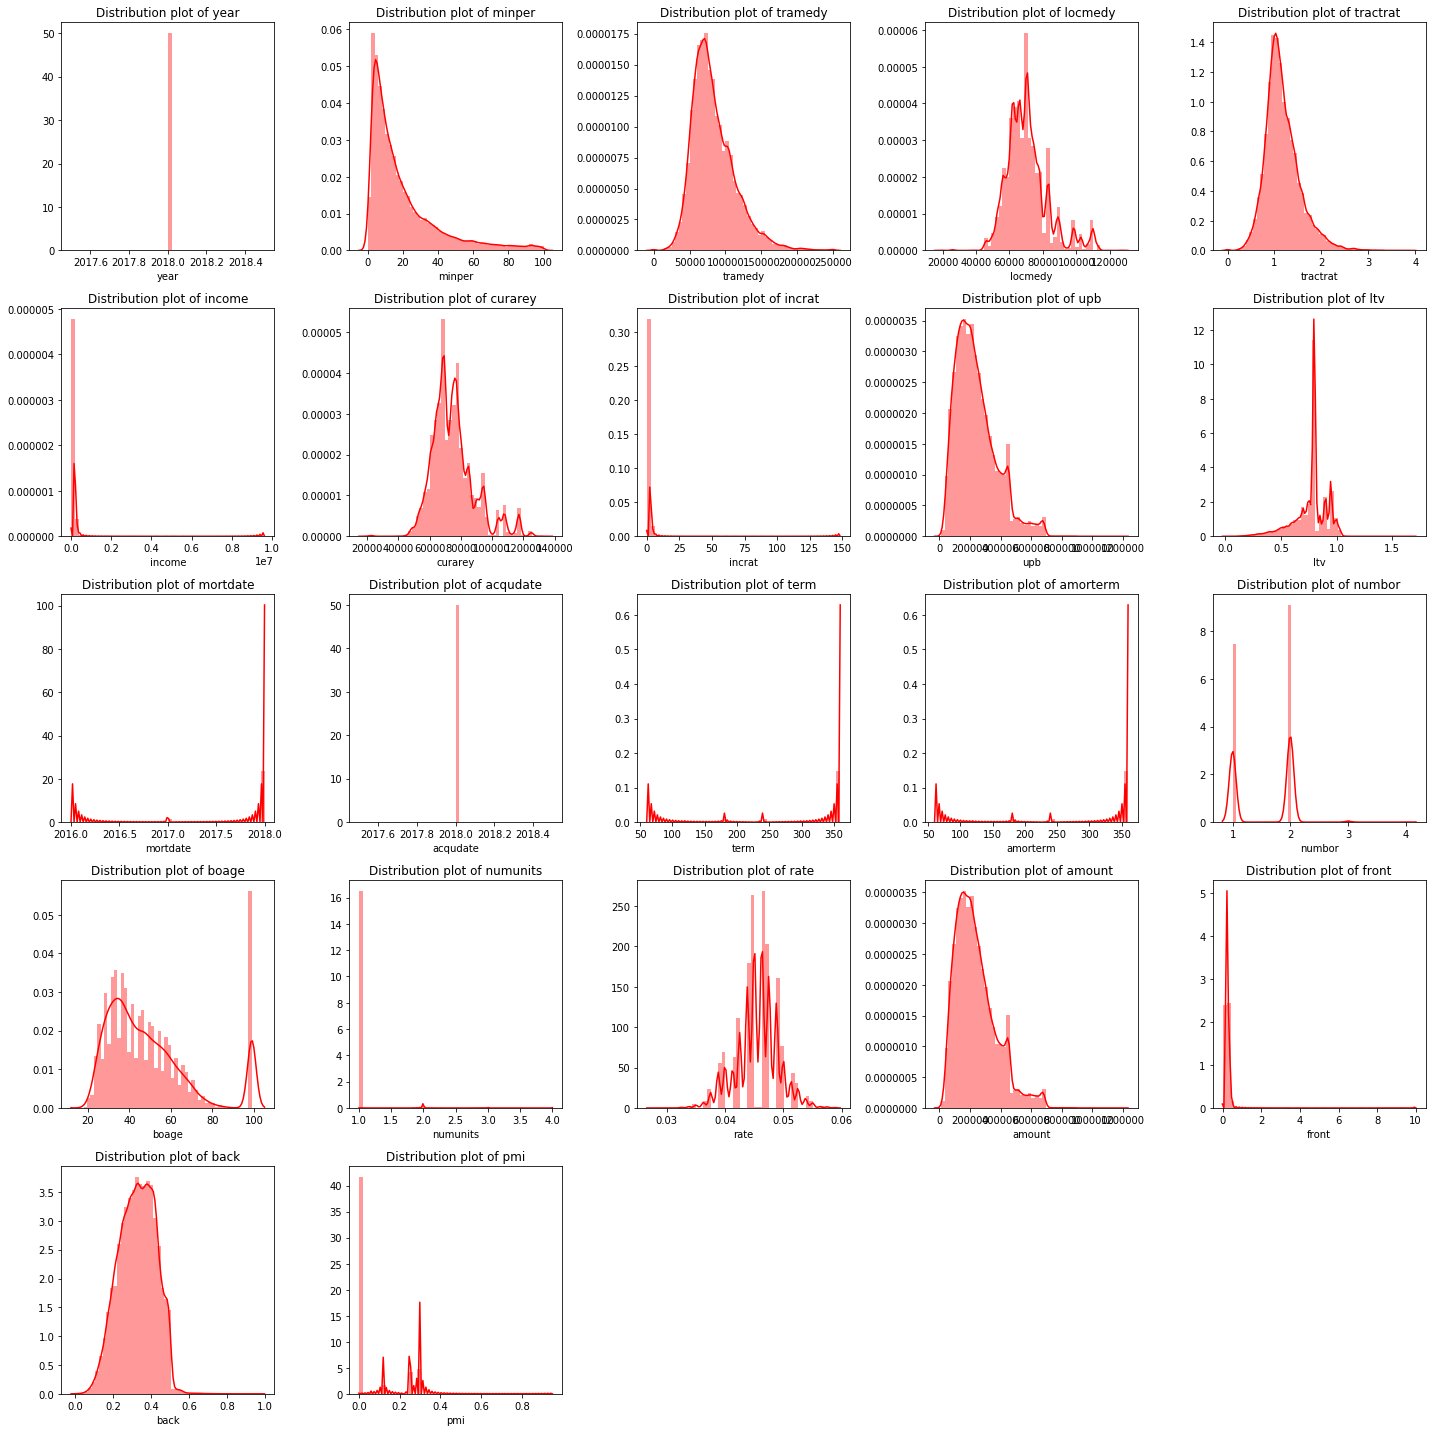

In [42]:
# Let's revist the continuous variables and see what the 
# data looks like; is there clean up to be done?
graphdistplt(df,feature_columns_cont)

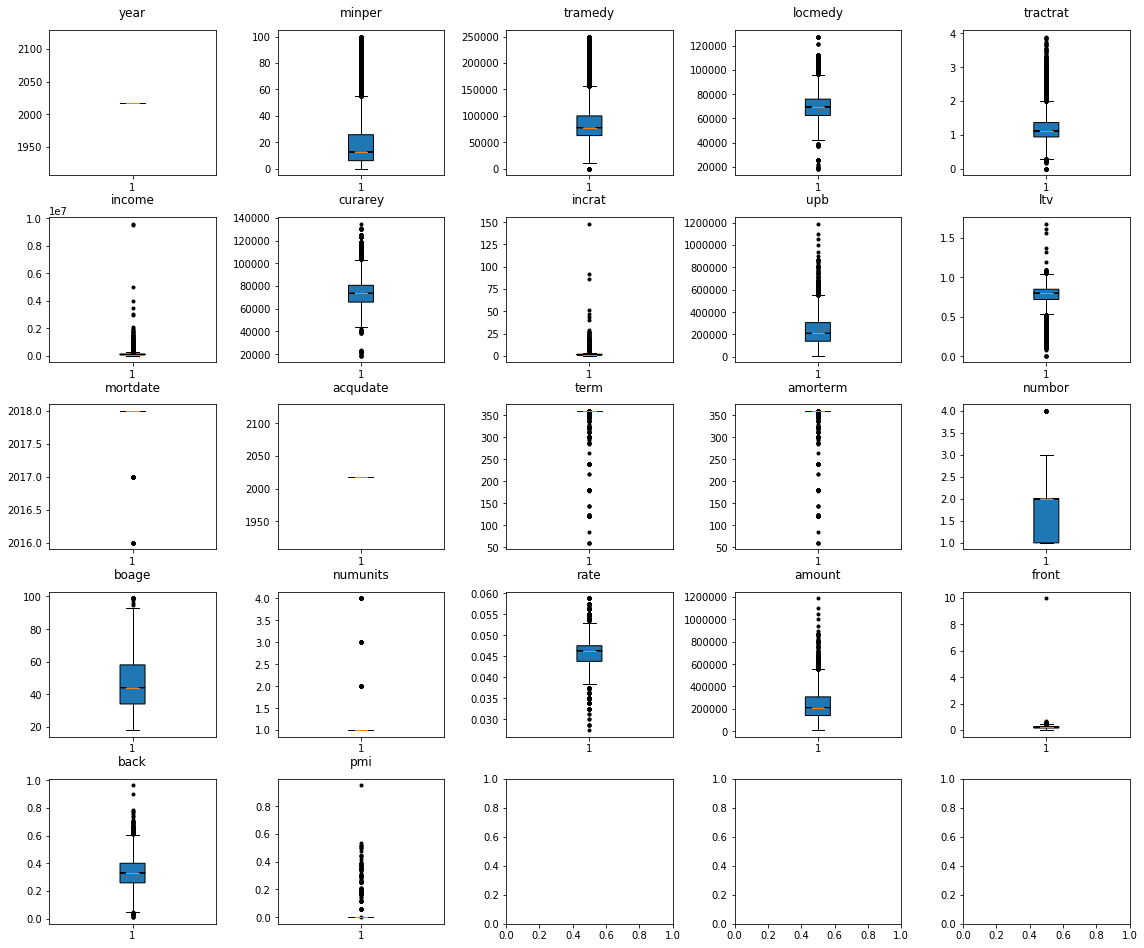

In [43]:
# Let's revist the continuous variables and see what the 
# data looks like; is there clean up to be done?
graphboxplt(df,feature_columns_cont)

We note that some of these continuous variables are not useful for our model; the dataset is mostly restricted to loans that were acquired in 2018 so year, mortdate and acqudate don't need to be investigated. Initially we were curious to see if there might be certain trends or clusters that relate to acquisition date of a mortgage but this dataset does not seem to contain the data needed to investigate such a possibility.  

NOTE ON OUTLIERS: We don't want to do any transformations for now, such as winsorization, that will make us lose what may intially seem like outliers for other columns. Though these graphs may show outliers in relation to where the majority of points lie, they are not outliers in terms of non-sensical data. For example, none of the percentage data incorrectly exceeds 100% or becomes negative. Additionally, some variables also become useless if we remove these 'outliers' since the column will be reduced to single values such as the term column which mostly seems to revolve around a full 360 months. We will consider handling income and boage as two columns that could benefit from removal of outliers on the upper end. We will do an intial round of modeling and then do tune ups as necessary.

In [49]:
# How many categorical columns do we have
len(feature_columns_cat)

18

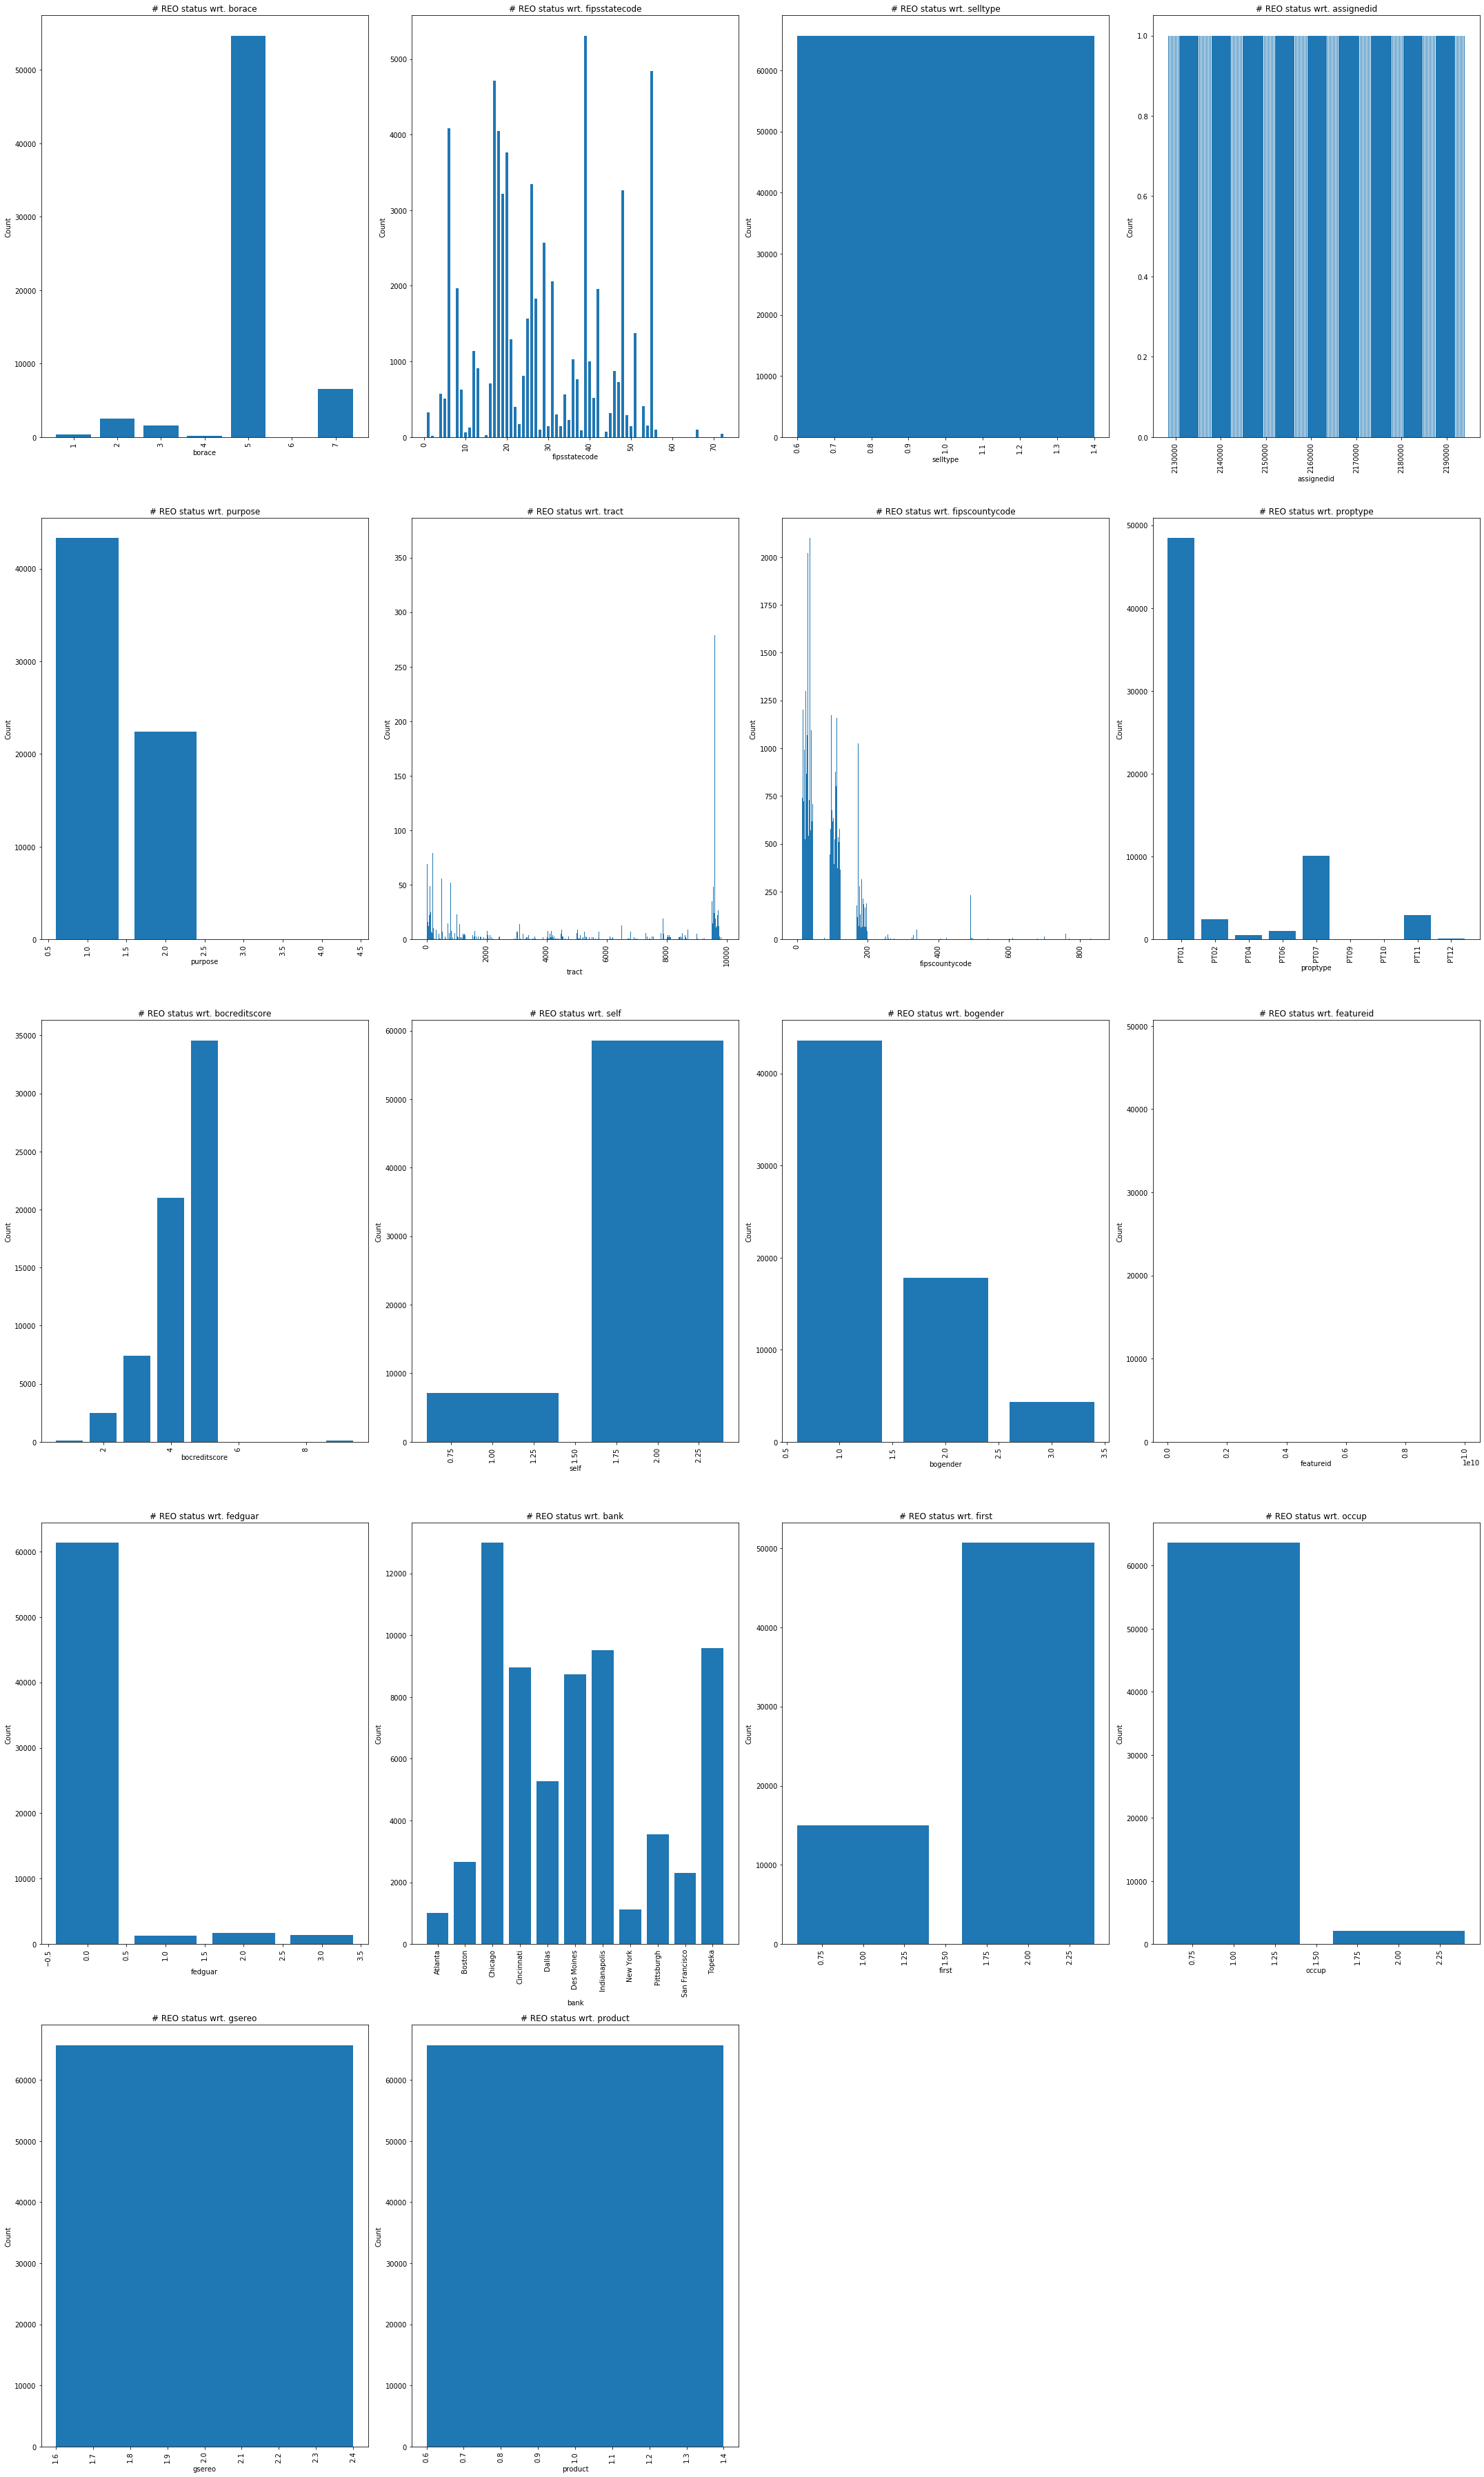

In [46]:
# # And how about our categorical data, what does that look like?
# # make graphs to visualize variation in categorical columns; 
plt.figure(figsize=(30,50))

for index, column in enumerate(feature_columns_cat):
    plt.subplot(5,4,index+1)
    plt.bar(df.groupby(column)["gsereo"].count().index, df.groupby(column)["gsereo"].count())
    plt.title(f"# REO status wrt. {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Interestingly, quantity of mortgages in REO status definitely varies with location, which is noted through a variety of columns. We suspect these columns will be colinear in a correlation matrix since they all are location related: fipsstatecode, tract,fipscountycode, bank. 
Additionally, we learn that some variables may not be useful at all such as product, featureid,selltype - in the case of these variables, though other categories are theoretically possible as per the dictionary, no other instances of the category exist. We will drop them going forward. Additionally, assignedID won't be a useful feature to look into since they are just identifiers of a unique loan.

We will revisit these categorical columns later; let's see what we can get with continuous variables for now.

Interestingly, quantity of mortgages in REO status definitely varies with location, which is noted through a variety of columns. We suspect these columns will be colinear in a correlation matrix since they all are location related: fipsstatecode, tract,fipscountycode, bank. 
Additionally, we learn that some variables may not be useful at all such as product, featureid,selltype - in the case of these variables, though other categories are theoretically possible as per the dictionary, no other instances of the category exist. We will drop them going forward. Additionally, assignedID won't be a useful feature to look into since they are just identifiers of a unique loan.

We will revisit these categorical columns later; let's see what we can get with continuous variables for now.

In [51]:
# let's look at our continuous variables and use a correlation matrix 
# to remove colinear variables.
corr = df[feature_columns_cont].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,year,minper,tramedy,locmedy,tractrat,income,curarey,incrat,upb,ltv,mortdate,acqudate,term,amorterm,numbor,boage,numunits,rate,amount,front,back,pmi
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
minper,nan,1,-0.072,0.23,-0.17,0.036,0.21,0.0041,0.27,0.00011,-0.071,nan,0.074,0.074,-0.086,0.00064,0.099,0.065,0.27,0.21,0.16,-0.0012
tramedy,nan,-0.072,1,0.47,0.87,0.22,0.46,0.12,0.48,-0.11,-0.03,nan,0.09,0.09,0.048,-0.016,-0.037,-0.036,0.48,0.14,0.067,-0.036
locmedy,nan,0.23,0.47,1,0.033,0.12,0.98,-0.072,0.43,-0.073,-0.019,nan,0.071,0.071,-0.0041,-0.096,0.051,0.0093,0.43,0.23,0.14,-0.021
tractrat,nan,-0.17,0.87,0.033,1,0.19,0.033,0.18,0.33,-0.083,-0.026,nan,0.07,0.07,0.053,0.018,-0.061,-0.044,0.33,0.056,0.014,-0.025
income,nan,0.036,0.22,0.12,0.19,1,0.12,0.96,0.41,-0.062,-0.0029,nan,-0.0076,-0.0076,0.21,0.034,-0.0047,-0.014,0.41,-0.29,-0.22,-0.03
curarey,nan,0.21,0.46,0.98,0.033,0.12,1,-0.079,0.41,-0.072,0.029,nan,0.073,0.073,-0.0062,-0.065,0.052,0.038,0.41,0.22,0.13,-0.021
incrat,nan,0.0041,0.12,-0.072,0.18,0.96,-0.079,1,0.33,-0.047,-0.0078,nan,-0.022,-0.022,0.21,0.049,-0.013,-0.023,0.33,-0.32,-0.24,-0.026
upb,nan,0.27,0.48,0.43,0.33,0.41,0.41,0.33,1,0.017,-0.045,nan,0.19,0.19,0.16,-0.012,0.049,0.04,1,0.26,0.19,0.0099
ltv,nan,0.00011,-0.11,-0.073,-0.083,-0.062,-0.072,-0.047,0.017,1,0.013,nan,0.24,0.24,-0.038,-0.23,-0.039,0.11,0.017,0.0029,0.12,0.49


That doesn't look good. Let's clean up our list of continuous variables.

In [52]:
feature_columns_cont

['year',
 'minper',
 'tramedy',
 'locmedy',
 'tractrat',
 'income',
 'curarey',
 'incrat',
 'upb',
 'ltv',
 'mortdate',
 'acqudate',
 'term',
 'amorterm',
 'numbor',
 'boage',
 'numunits',
 'rate',
 'amount',
 'front',
 'back',
 'pmi']

In [53]:
feature_columns_cont1 = [#'year',
                        'minper',
                        'tramedy',
                        'locmedy',
                        'tractrat',
                        'income',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        #'acqudate',
                        'term',
                        'amorterm',
                        'numbor',
                        'boage',
                        'numunits',
                        'rate',
                        'amount',
                        'front',
                        'back',
                        'pmi']

In [54]:
# let's look at our updated continuous variables and use a correlation matrix 
# to remove colinear variables.
corr = df[feature_columns_cont1].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,minper,tramedy,locmedy,tractrat,income,curarey,incrat,upb,ltv,mortdate,term,amorterm,numbor,boage,numunits,rate,amount,front,back,pmi
minper,1,-0.072,0.23,-0.17,0.036,0.21,0.0041,0.27,0.00011,-0.071,0.074,0.074,-0.086,0.00064,0.099,0.065,0.27,0.21,0.16,-0.0012
tramedy,-0.072,1,0.47,0.87,0.22,0.46,0.12,0.48,-0.11,-0.03,0.09,0.09,0.048,-0.016,-0.037,-0.036,0.48,0.14,0.067,-0.036
locmedy,0.23,0.47,1,0.033,0.12,0.98,-0.072,0.43,-0.073,-0.019,0.071,0.071,-0.0041,-0.096,0.051,0.0093,0.43,0.23,0.14,-0.021
tractrat,-0.17,0.87,0.033,1,0.19,0.033,0.18,0.33,-0.083,-0.026,0.07,0.07,0.053,0.018,-0.061,-0.044,0.33,0.056,0.014,-0.025
income,0.036,0.22,0.12,0.19,1,0.12,0.96,0.41,-0.062,-0.0029,-0.0076,-0.0076,0.21,0.034,-0.0047,-0.014,0.41,-0.29,-0.22,-0.03
curarey,0.21,0.46,0.98,0.033,0.12,1,-0.079,0.41,-0.072,0.029,0.073,0.073,-0.0062,-0.065,0.052,0.038,0.41,0.22,0.13,-0.021
incrat,0.0041,0.12,-0.072,0.18,0.96,-0.079,1,0.33,-0.047,-0.0078,-0.022,-0.022,0.21,0.049,-0.013,-0.023,0.33,-0.32,-0.24,-0.026
upb,0.27,0.48,0.43,0.33,0.41,0.41,0.33,1,0.017,-0.045,0.19,0.19,0.16,-0.012,0.049,0.04,1,0.26,0.19,0.0099
ltv,0.00011,-0.11,-0.073,-0.083,-0.062,-0.072,-0.047,0.017,1,0.013,0.24,0.24,-0.038,-0.23,-0.039,0.11,0.017,0.0029,0.12,0.49
mortdate,-0.071,-0.03,-0.019,-0.026,-0.0029,0.029,-0.0078,-0.045,0.013,1,-0.0037,-0.0037,0.0075,0.021,-0.0096,0.35,-0.047,-0.02,-0.014,0.018


Let's remove tractrat which is actually based on the tramedy column. We can also suffice with curarey and drop more detailed locmedy data. Let's keep incrat and drop income - this also affords us to not have to deal with the outliers of the income column. We can drop term and amorterm since almost all the data is from 2019. UPB and amount are the same since all the loans are from 2018. If we had data going back multiple years, the distinctions between these columns would have been more helpful. We will keep UPB.

In [57]:
# let's make a new variable of continuous variable features to keep as per our comments
feature_columns_cont2 =['minper',
                        'tramedy',
                        #'locmedy',
                        #'tractrat',
                        #'income',
                        'curarey',
                        'incrat',
                        'upb',
                        'ltv',
                        'mortdate',
                        #'term',
                        #'amorterm',
                        'numbor',
                        'boage',
                        'numunits',
                        'rate',
                        #'amount',
                        'front',
                        'back',
                        'pmi']

In [58]:
# let's look at our updated continuous variables using correlation matrix
corr = df[feature_columns_cont2].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,minper,tramedy,curarey,incrat,upb,ltv,mortdate,numbor,boage,numunits,rate,front,back,pmi
minper,1,-0.072,0.21,0.0041,0.27,0.00011,-0.071,-0.086,0.00064,0.099,0.065,0.21,0.16,-0.0012
tramedy,-0.072,1,0.46,0.12,0.48,-0.11,-0.03,0.048,-0.016,-0.037,-0.036,0.14,0.067,-0.036
curarey,0.21,0.46,1,-0.079,0.41,-0.072,0.029,-0.0062,-0.065,0.052,0.038,0.22,0.13,-0.021
incrat,0.0041,0.12,-0.079,1,0.33,-0.047,-0.0078,0.21,0.049,-0.013,-0.023,-0.32,-0.24,-0.026
upb,0.27,0.48,0.41,0.33,1,0.017,-0.045,0.16,-0.012,0.049,0.04,0.26,0.19,0.0099
ltv,0.00011,-0.11,-0.072,-0.047,0.017,1,0.013,-0.038,-0.23,-0.039,0.11,0.0029,0.12,0.49
mortdate,-0.071,-0.03,0.029,-0.0078,-0.045,0.013,1,0.0075,0.021,-0.0096,0.35,-0.02,-0.014,0.018
numbor,-0.086,0.048,-0.0062,0.21,0.16,-0.038,0.0075,1,0.016,-0.022,-0.03,-0.23,-0.098,-0.0085
boage,0.00064,-0.016,-0.065,0.049,-0.012,-0.23,0.021,0.016,1,-0.0076,0.009,-0.041,-0.024,-0.13
numunits,0.099,-0.037,0.052,-0.013,0.049,-0.039,-0.0096,-0.022,-0.0076,1,0.017,0.062,0.044,-0.037


## 4. Unsupervised Models

In [59]:
# define dataframe with only the useful continuous variables
df1 = df[feature_columns_cont2] 

# Define the features and the outcome.
X = df1

# y is binary so that 1 means property is in REO status and 2 means it is not.
y = df['gsereo']

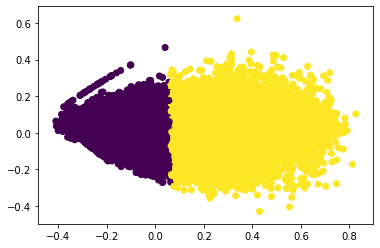

Comparing k-means clusters against the data:
gsereo      2
row_0        
0       44385
1       21318


In [60]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [ ]:
# let's revisit our correlation matrix without the columns that begin with 'num_'. 
corr = df[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

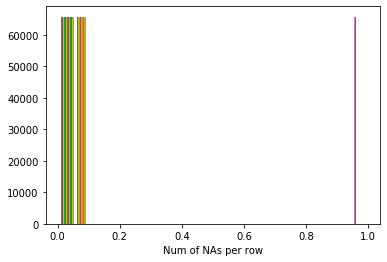

In [21]:
## Dictionary shows that abberant data is listed as: 98, 9999999999, 99, 99999
count = df.values == 9999999999 # sum up all the NAs by each row of the df
#(df.education.values == 'a').sum()
plt.hist(count) # make a histogram of the counts by row
plt.xlabel("Num of NAs per row") # x-axis label
plt.show()

In [22]:
# taken from kaggle starter code, a function that plots 
# the correlation matrix given a df and graphWidth

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

- Feature Engineering
- Pick the columns for the dataframe 

- Start with K-means
- Supervised vs unsupervised clustering, see if you get similar clusters
- (taking from the curriculum)

